In [1]:
# load dataset 
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

# Training model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

model = MLPClassifier(
    hidden_layer_sizes=(64, 32), max_iter=1000, activation='relu', solver='adam', random_state=42
)

model.fit(X_train_scaled, y_train)

# evaluasi model 
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Accuracy per fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy per fold: [0.96551724 0.96551724 1.         0.92857143 1.        ]
Rata-rata akurasi: 0.97192118226601


# GridsearchCV

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid = GridSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)
print("Best score :", grid.best_score_)

# Evaluasi model
y_pred = grid.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:', classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best score : 0.9928571428571429
Accuracy: 1.0
Confusion matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



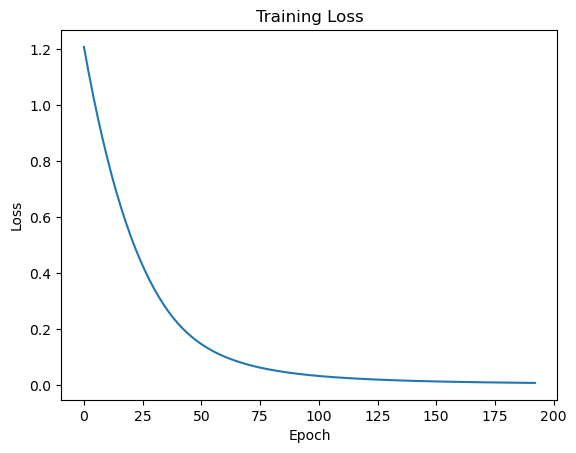

In [3]:
import matplotlib.pyplot as plt

model.fit(X_train_scaled, y_train)
plt.plot(model.loss_curve_)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
